In [1]:
%matplotlib notebook

In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set path for file
csvpath = os.path.join("loan.csv")
print(csvpath)

loan.csv


In [3]:
loans_df = pd.read_csv(csvpath)
loans_df.head()

C:\Users\VenetaBootCamp\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pertinent_loans_df = loans_df[[ "annual_inc", "loan_amnt", "term", "int_rate", "total_pymnt", "issue_d", "addr_state", "zip_code"]]
pertinent_loans_df

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code
0,55000.0,2500,36 months,13.56,167.020000,Dec-2018,NY,109xx
1,90000.0,30000,60 months,18.94,1507.110000,Dec-2018,LA,713xx
2,59280.0,5000,36 months,17.97,353.890000,Dec-2018,MI,490xx
3,92000.0,4000,36 months,18.94,286.710000,Dec-2018,WA,985xx
4,57250.0,30000,60 months,16.14,1423.210000,Dec-2018,MD,212xx
...,...,...,...,...,...,...,...,...
2260663,58000.0,12000,60 months,14.08,5360.960000,Oct-2017,VT,054xx
2260664,30000.0,12000,60 months,25.82,14499.802172,Oct-2017,OR,971xx
2260665,64000.0,10000,36 months,11.99,5306.940000,Oct-2017,IL,603xx
2260666,60000.0,12000,60 months,21.45,5207.290000,Oct-2017,AK,996xx


In [5]:
pertinent_loans_df["annual_inc"].max()

110000000.0

In [6]:
# Create the bins in which annual_inc will be held, based on tax brackets
bins = [0, 9700, 39475, 84200, 160725, 204100, 510300, 110000000]


# Create the names for the four bins
income_tiers = ["Tier_One", "Tier_Two", "Tier_Three", "Tier_Four", "Tier_Five", "Tier_Six", "Tier_Seven"]

In [7]:
a = pd.cut(pertinent_loans_df["annual_inc"], bins, labels=income_tiers)
a.head()

0    Tier_Three
1     Tier_Four
2    Tier_Three
3     Tier_Four
4    Tier_Three
Name: annual_inc, dtype: category
Categories (7, object): [Tier_One < Tier_Two < Tier_Three < Tier_Four < Tier_Five < Tier_Six < Tier_Seven]

In [8]:
pertinent_loans_df["tier_group"] = a
pertinent_loans_df.head()

C:\Users\VenetaBootCamp\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,tier_group
0,55000.0,2500,36 months,13.56,167.02,Dec-2018,NY,109xx,Tier_Three
1,90000.0,30000,60 months,18.94,1507.11,Dec-2018,LA,713xx,Tier_Four
2,59280.0,5000,36 months,17.97,353.89,Dec-2018,MI,490xx,Tier_Three
3,92000.0,4000,36 months,18.94,286.71,Dec-2018,WA,985xx,Tier_Four
4,57250.0,30000,60 months,16.14,1423.21,Dec-2018,MD,212xx,Tier_Three


In [9]:
loan_group = pertinent_loans_df.groupby("tier_group")

teir_total_loans = loan_group["annual_inc"].count()

print(teir_total_loans)

tier_group
Tier_One         2954
Tier_Two       343095
Tier_Three    1196274
Tier_Four      604591
Tier_Five       59806
Tier_Six        48894
Tier_Seven       3383
Name: annual_inc, dtype: int64


In [10]:
#barlist=plt.bar([1,2,3,4,], [1,2,3,4])
#barlist[0].set_color('r')

<IPython.core.display.Javascript object>


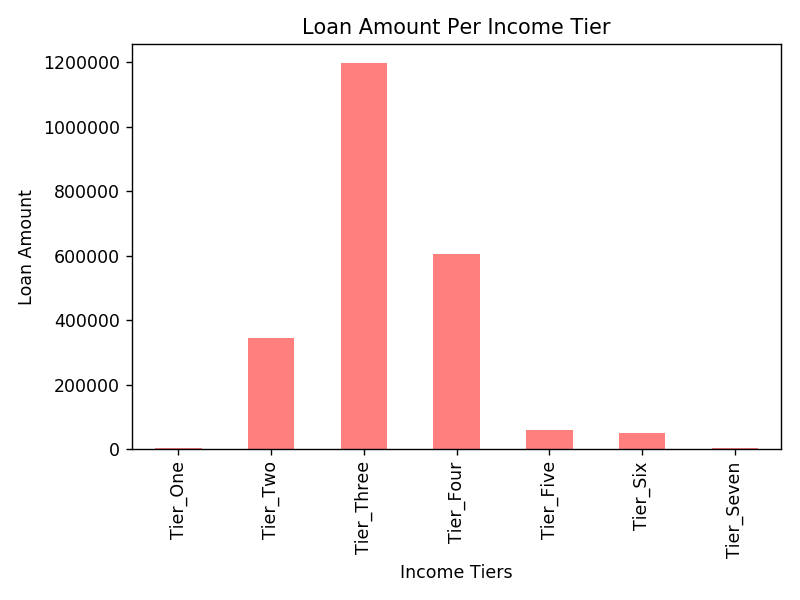

In [18]:
chart = teir_total_loans.plot(kind='bar', color='r', alpha=0.5, align="center")

chart.set_xlabel("Income Tiers")
chart.set_ylabel("Loan Amount")
plt.title("Loan Amount Per Income Tier")
plt.xlabel("Income Tiers")
plt.ylabel("Loan Amount")
plt.show()
plt.tight_layout()

In [12]:
plt.title("Loan Amount Per Income Tier")
plt.xlabel("Income Tiers")
plt.ylabel("Loan Amount")

Text(3.347222222222216, 0.5, 'Loan Amount')

In [13]:
# Create a GroupBy object based upon "View Group"
loan_group = pertinent_loans_df.groupby("tier_group")

# Find how many rows fall into each bin
print(loan_group["annual_inc"].count())

# Get the average of each column within the GroupBy object
loan_group[["int_rate", "loan_amnt", "annual_inc"]].mean()

tier_group
Tier_One         2954
Tier_Two       343095
Tier_Three    1196274
Tier_Four      604591
Tier_Five       59806
Tier_Six        48894
Tier_Seven       3383
Name: annual_inc, dtype: int64


,int_rate,loan_amnt,annual_inc
tier_group,,,
Tier_One,14.813074,11096.267773,6.529720e+03
Tier_Two,13.962959,8677.464842,2.989422e+04
Tier_Three,13.252005,13711.771613,5.970080e+04
Tier_Four,12.506046,19535.365230,1.101832e+05
Tier_Five,11.945691,23553.136809,1.814288e+05
Tier_Six,11.709249,25823.841371,2.769104e+05
Tier_Seven,11.682722,26295.876441,1.068499e+06


100 loans from each tier 

In [14]:
##df.iloc[np.random.randint(1,1000), :]